[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

#  Regression - Decision Tree

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 07/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0053RegressorDecisionTree.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotRegressionData


In [5]:
# General Auxiliary Functions

def PlotRegressor( hR: Callable, vX: np.ndarray, labelReg: str = 'Regressor', hA: Optional[plt.Axes] = None, figSize: Tuple = FIG_SIZE_DEF ):

    if hA is None:
        hF, hA = plt.subplots(figsize = figSize)
    else:
        hF = hA.get_figure()
    
    hA.plot(vX, hR(np.reshape(vX, (-1, 1))), c = 'r', lw = 2, label = labelReg)

    return hA

def PlotDecisionTree( splitCriteria: str, numLeaf: int, vX: np.ndarray, vY: np.ndarray, vG: np.ndarray ) -> plt.Axes:

    mX = np.reshape(vX, (-1, 1))
    mG = np.reshape(vG, (-1, 1))

    # Train the classifier
    oTreeReg = DecisionTreeRegressor(criterion = splitCriteria, max_leaf_nodes = numLeaf, random_state = 0)
    oTreeReg = oTreeReg.fit(mX, vY)
    scoreR2  = oTreeReg.score(mX, vY)
    
    hF, hA = plt.subplots(1, 2, figsize = (16, 8))
    hA = hA.flat
    
    # Decision Boundary
    hA[0] = PlotRegressor(oTreeReg.predict, vG, hA = hA[0])
    hA[0] = PlotRegressionData(vX, vY, hA = hA[0], axisTitle = f'Regression, R2 = {scoreR2:0.2f}')
    hA[0].set_xlabel('$x$')
    hA[0].set_ylabel('$y$')

    # Plot the Tree
    plot_tree(oTreeReg, filled = True, ax = hA[1], rounded = True)
    hA[1].set_title(f'Max Leaf Nodes = {numLeaf}')

    return hA


## Decision Tree Regression

The _Decision Tree Regression_ is a non parametric model for regression.  
It uses the mean statistics within the leaf box to estimate the value at the box.

* <font color='brown'>(**#**)</font> There are generalizations which estimate the value using local linear model within the leaf (_Box_).

In [6]:
# Parameters

# Data Generation (1st)
numSamples = 201
noiseStd   = 0.05


# Data Visualization
numGridPts = 500


## Generate / Load Data

Using a segmented function.


In [7]:
# Data Generating Function

def f( vX: np.ndarray ) -> np.ndarray:
    vY            = 0.5 * np.ones(vX.shape[0])
    vY[vX < 3.25] = 1
    vY[vX < 2.5 ] = 0.5 + (vX[vX < 2.5] / 5) - 0.25
    vY[vX < 1.5 ] = 0
    
    return vY

In [8]:
# Generate Data

vG = np.linspace(-0.5, 5.5, 1000) #<! Data Support Grid

vX = 5 * np.random.rand(numSamples)
vY = f(vX) + (noiseStd * np.random.randn(numSamples))

print(f'The features data shape: {vX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (201,)
The labels data shape: (201,)


### Plot Data

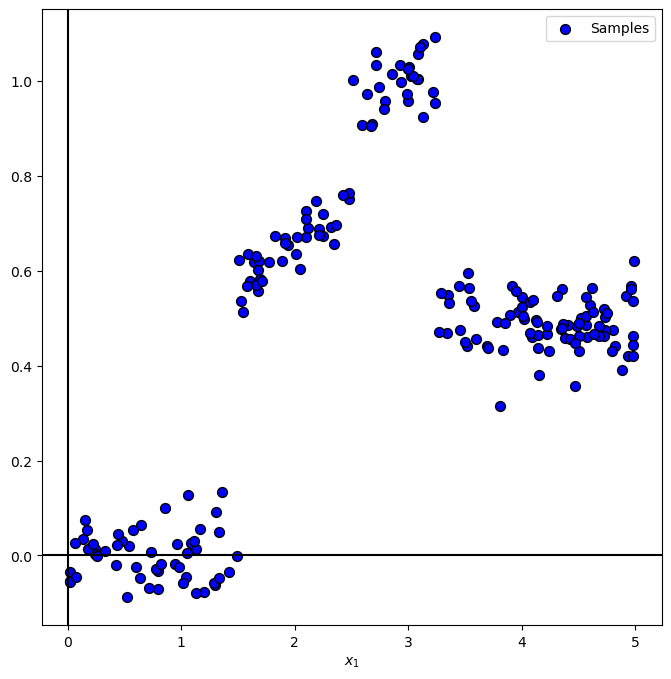

In [9]:
# Plot the Data

PlotRegressionData(vX, vY)

plt.show()


## Train a Decision Tree Regressor

Decision trains, with enough degrees of freedom, can easily overfit to data (Represent any data).  
Hence their tweaking is important.  

The decision tree is implemented in the [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) class.

* <font color='brown'>(**#**)</font> The SciKit Learn default for a Decision Tree tend to overfit data.
* <font color='brown'>(**#**)</font> The `max_depth` parameter and `max_leaf_nodes` parameter are usually used exclusively.
* <font color='brown'>(**#**)</font> We can learn about the data by the orientation of the tree (How balanced it is). 
* <font color='brown'>(**#**)</font> Decision Trees are usually used in the context of ensemble (Random Forests / Boosted Trees).


In [10]:
# Plotting Wrapper

hPlotDecisionTree = lambda splitCriteria, numLeaf: PlotDecisionTree(splitCriteria, numLeaf, vX, vY, vG)

In [11]:
# Interactive Visualization

splitCriteriaDropdown   = Dropdown(options = ['squared_error', 'friedman_mse', 'absolute_error'], value = 'squared_error', description = 'Split Criteria')
numLeafSlider           = IntSlider(min = 2, max = 25, step = 1, value = 2, layout = Layout(width = '30%'))
interact(hPlotDecisionTree, splitCriteria = splitCriteriaDropdown, numLeaf = numLeafSlider)

plt.show()

interactive(children=(Dropdown(description='Split Criteria', options=('squared_error', 'friedman_mse', 'absolu…

* <font color='red'>(**?**)</font> What are the values beyond the original domain?